In [1]:
import time

In [2]:
"""
Problem 1
"""

'\nProblem 1\n'

In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Random seed for reproducibility
np.random.seed(42)

# Generating synthetic data from three different Gaussian distributions
# Mean, covariance, and sample size
mean1, cov1, size1 = [0, 0], [[1, 0.5], [0.5, 1]], 500
mean2, cov2, size2 = [5, 5], [[1, -0.3], [-0.3, 1]], 500
mean3, cov3, size3 = [-5, 5], [[1, 0.2], [0.2, 1]], 500

# Generating data for each distribution
data1 = np.random.multivariate_normal(mean1, cov1, size1)
data2 = np.random.multivariate_normal(mean2, cov2, size2)
data3 = np.random.multivariate_normal(mean3, cov3, size3)

In [5]:
# Combining the 3 Gaussian distributions to form 1 multimodal distribution
data = np.vstack([data1, data2, data3])

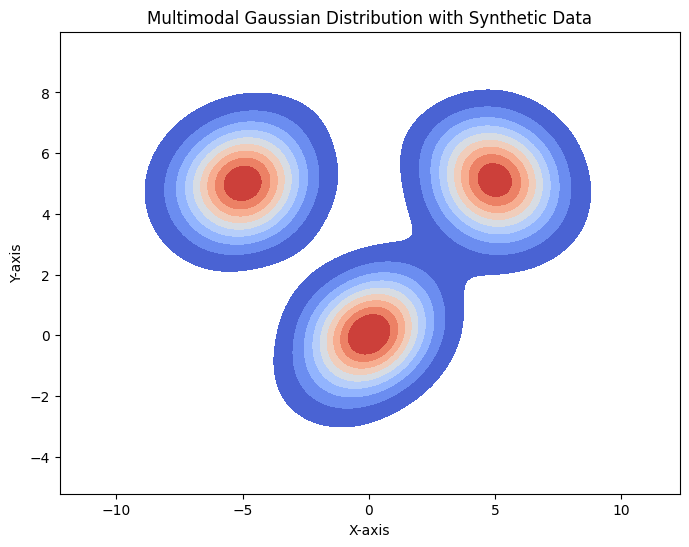

In [6]:
# Plot the multimodal distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(x=data[:, 0], y=data[:, 1], fill=True, cmap="coolwarm")
plt.title("Multimodal Gaussian Distribution with Synthetic Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [7]:
# Extract x and y from the multimodal Gaussian data in Problem 1
x_gaussian = data[:, 0]  # X-axis from multimodal data
y_gaussian = data[:, 1]  # Y-axis from multimodal data

In [8]:
"""
Problem 2
"""

'\nProblem 2\n'

In [9]:
from scipy import optimize

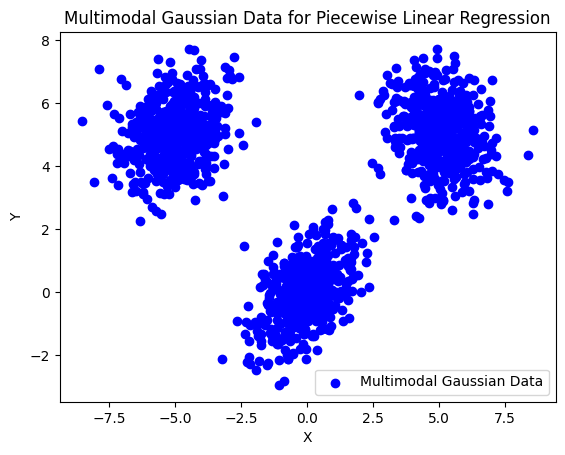

In [10]:
# Using the data from Problem 1 (multimodal Gaussian data)
x = x_gaussian  # From Problem 1
y = y_gaussian  # From Problem 1

# Plotting the data from Problem 1
plt.scatter(x, y, color='blue', label='Multimodal Gaussian Data')
plt.title("Multimodal Gaussian Data for Piecewise Linear Regression")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [11]:
# Measuring execution time for Piecewise Linear Regression
start_time_linear = time.time()

def piecewise_linear(x, x0, x1, y0, y1, y2):
    """
    Piecewise linear function
    """
    return np.piecewise(x, [x < x0, (x >= x0) & (x < x1), x >= x1],
                        [lambda x: y0*x, 
                         lambda x: y1*x - (y1-y0)*x0,
                         lambda x: y2*x - (y2-y1)*x1 + (y1-y0)*x0])

# Initial guess for the optimization
p0 = [0, 5, 1, -1, 2]  # x0, x1, y0, y1, y2

# Curve fitting
params, _ = optimize.curve_fit(piecewise_linear, x, y, p0)

# Fitted curve
x_fit = np.linspace(min(x), max(x), 100)
y_fit = piecewise_linear(x_fit, *params)

end_time_linear = time.time()
execution_time_linear = end_time_linear - start_time_linear

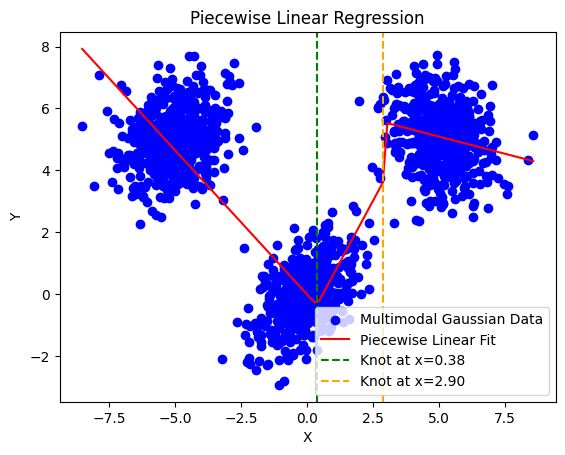

In [12]:
# Plotting results
plt.scatter(x, y, color='blue', label='Multimodal Gaussian Data')
plt.plot(x_fit, y_fit, color='red', label='Piecewise Linear Fit')
plt.axvline(x=params[0], color='green', linestyle='--', label=f'Knot at x={params[0]:.2f}')
plt.axvline(x=params[1], color='orange', linestyle='--', label=f'Knot at x={params[1]:.2f}')
plt.title("Piecewise Linear Regression")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
# Displaying the knots (x0 and x1)
print(f"Knots found at: x0 = {params[0]:.2f}, x1 = {params[1]:.2f}")

Knots found at: x0 = 0.38, x1 = 2.90


In [14]:
"""
Problem 3
"""

'\nProblem 3\n'

In [15]:
from scipy.interpolate import LSQUnivariateSpline

In [16]:
# Measuring execution time for Piecewise Polynomial Regression
start_time_poly = time.time()

# Using the data from Problem 1
x = x_gaussian  # From Problem 1
y = y_gaussian  # From Problem 1

# Sorting x and y based on x
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Knots also from Problem 2, x0 and x1
x_knots = [params[0], params[1]]

# Fitting a piecewise polynomial regression (degree 2) using least squares splines
# LSQUnivariateSpline needs sorted data and defines the knot locations explicitly
spline_poly = LSQUnivariateSpline(x_sorted, y_sorted, x_knots, k=2)  # k=2 means quadratic

# Generating x-values for plotting the spline
x_fit_poly = np.linspace(min(x_sorted), max(x_sorted), 100)
y_fit_poly = spline_poly(x_fit_poly)

end_time_poly = time.time()
execution_time_poly = end_time_poly - start_time_poly

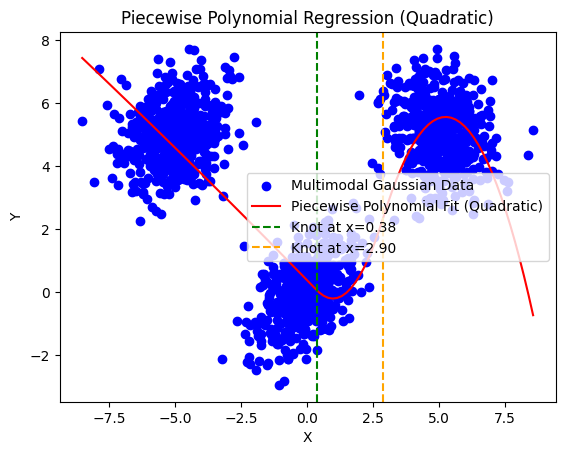

In [17]:
# Plotting results
plt.scatter(x_sorted, y_sorted, color='blue', label='Multimodal Gaussian Data')
plt.plot(x_fit_poly, y_fit_poly, color='red', label='Piecewise Polynomial Fit (Quadratic)')
plt.axvline(x=x_knots[0], color='green', linestyle='--', label=f'Knot at x={x_knots[0]:.2f}')
plt.axvline(x=x_knots[1], color='orange', linestyle='--', label=f'Knot at x={x_knots[1]:.2f}')
plt.title("Piecewise Polynomial Regression (Quadratic)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [18]:
# Display knots
print(f"Knots used for piecewise polynomial regression: x0 = {x_knots[0]:.2f}, x1 = {x_knots[1]:.2f}")

Knots used for piecewise polynomial regression: x0 = 0.38, x1 = 2.90


In [19]:
"""
Problem 4
"""

'\nProblem 4\n'

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from numpy.polynomial import Polynomial

In [21]:
# RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [22]:
# F-statistics function
def f_stat(y_true, y_pred, p, n):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    total_sum_of_squares = np.sum((y_true - np.mean(y_true)) ** 2)
    f_stat_value = ((total_sum_of_squares - residual_sum_of_squares) / p) / (residual_sum_of_squares / (n - p - 1))
    return f_stat_value

In [23]:
#### 1. Performance Metrics for Piecewise Linear Regression.
y_pred_linear = piecewise_linear(x, *params)
n_linear = len(x)
p_linear = len(params) - 1  # Number of parameters (excluding the intercepts)

rmse_linear = rmse(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
f_stat_linear = f_stat(y, y_pred_linear, p_linear, n_linear)

print(f"Piecewise Linear Regression:\n RMSE = {rmse_linear:.4f}, R² = {r2_linear:.4f}, F-statistic = {f_stat_linear:.4f}\n")

Piecewise Linear Regression:
 RMSE = 1.3040, R² = 0.7431, F-statistic = 1081.2337



In [24]:
#### 2. Performance Metrics for Piecewise Polynomial Regression
y_pred_poly = spline_poly(x)
n_poly = len(x)
p_poly = 2 + len(x_knots)  # Degree of the polynomial + number of knots

rmse_poly = rmse(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)
f_stat_poly = f_stat(y, y_pred_poly, p_poly, n_poly)

print(f"Piecewise Polynomial Regression (Quadratic):\n RMSE = {rmse_poly:.4f}, R² = {r2_poly:.4f}, F-statistic = {f_stat_poly:.4f}\n")

Piecewise Polynomial Regression (Quadratic):
 RMSE = 1.4227, R² = 0.6942, F-statistic = 848.6355



In [25]:
"""
Question 4 and 5
"""

'\nQuestion 4 and 5\n'

In [26]:
# Measure execution time for Polynomial Regression on Multimodal Gaussian Data
start_time_gaussian = time.time()

#### 3. Polynomial Regression for the Multimodal Gaussian Distribution (Problem 1)
x_gaussian = data[:, 0] # x-axis from multimodal data
y_gaussian = data[:, 1] # y-axis from multimodal data

# Fit a 3rd-degree polynomial to the multimodal Gaussian data
degree = 3
poly_gaussian = Polynomial.fit(x_gaussian, y_gaussian, degree)

# Generate predictions
y_pred_gaussian = poly_gaussian(x_gaussian)

# Performance metrics for the Gaussian Polynomial Model
n_gaussian = len(x_gaussian)
p_gaussian = degree + 1  # Number of polynomial parameters (degree + intercept)

rmse_gaussian = rmse(y_gaussian, y_pred_gaussian)
r2_gaussian = r2_score(y_gaussian, y_pred_gaussian)
f_stat_gaussian = f_stat(y_gaussian, y_pred_gaussian, p_gaussian, n_gaussian)

print(f"Polynomial Regression for Multimodal Gaussian Data (Degree {degree}):\n RMSE = {rmse_gaussian:.4f}, R² = {r2_gaussian:.4f}, F-statistic = {f_stat_gaussian:.4f}\n")


end_time_gaussian = time.time()
execution_time_gaussian = end_time_gaussian - start_time_gaussian

Polynomial Regression for Multimodal Gaussian Data (Degree 3):
 RMSE = 1.7844, R² = 0.5190, F-statistic = 403.3440



In [27]:
# Displaying the comparison between all models (Problem 4 solution)

print("Comparison of All Models (Problem 4):")
print(f"{'Model':<45}{'RMSE':<15}{'R²':<15}{'F-statistic':<15}")
print("-" * 100)

# Piecewise Linear Regression
print(f"{'Piecewise Linear Regression':<45}{rmse_linear:<15.4f}{r2_linear:<15.4f}{f_stat_linear:<15.4f}")

# Piecewise Polynomial Regression (Quadratic)
print(f"{'Piecewise Polynomial Regression (Quadratic)':<45}{rmse_poly:<15.4f}{r2_poly:<15.4f}{f_stat_poly:<15.4f}")

# Polynomial Regression for Multimodal Gaussian Data (Degree 3)
print(f"{'Polynomial Regression for Multimodal Gaussian Data (Degree 3)':<45}{rmse_gaussian:<15.4f}{r2_gaussian:<15.4f}{f_stat_gaussian:<15.4f}")


Comparison of All Models (Problem 4):
Model                                        RMSE           R²             F-statistic    
----------------------------------------------------------------------------------------------------
Piecewise Linear Regression                  1.3040         0.7431         1081.2337      
Piecewise Polynomial Regression (Quadratic)  1.4227         0.6942         848.6355       
Polynomial Regression for Multimodal Gaussian Data (Degree 3)1.7844         0.5190         403.3440       


In [28]:
"""
Problem 5
"""

'\nProblem 5\n'

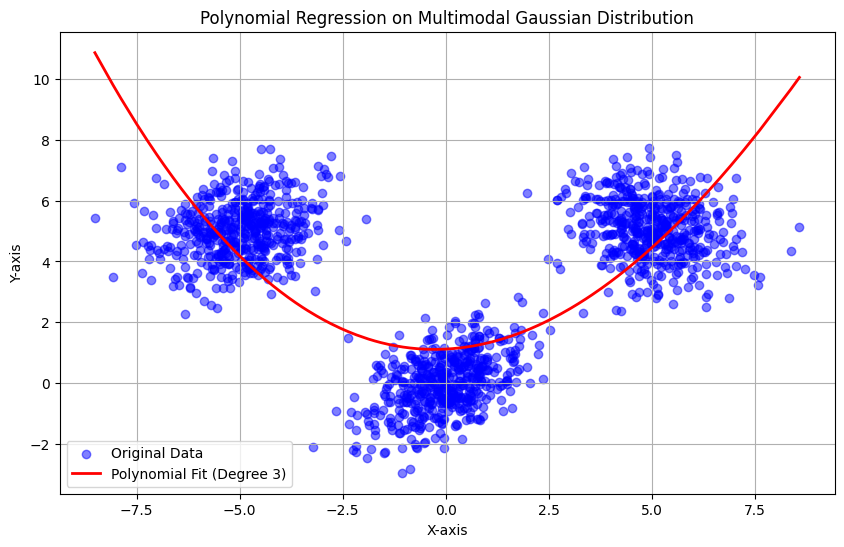

In [29]:
# Plotting the original data and the polynomial fit for the multimodal Gaussian distribution (Problem 5 solution)
plt.figure(figsize=(10, 6))
plt.scatter(x_gaussian, y_gaussian, color='blue', label='Original Data', alpha=0.5)
plt.plot(np.sort(x_gaussian), poly_gaussian(np.sort(x_gaussian)), color='red', label='Polynomial Fit (Degree 3)', linewidth=2)
plt.title('Polynomial Regression on Multimodal Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
"""
Problem 6
"""

'\nProblem 6\n'

In [31]:
# Calculate differences
time_differences = {
    'Linear vs Polynomial': execution_time_poly - execution_time_linear,
    'Polynomial vs Gaussian': execution_time_gaussian - execution_time_poly,
    'Linear vs Gaussian': execution_time_gaussian - execution_time_linear
}

In [32]:
# Display execution times
print("\nExecution Time Comparison (in seconds):")
print(f"{'Model':<45}{'Execution Time (s)':<20}")
print("-" * 65)
print(f"{'Piecewise Linear Regression':<45}{execution_time_linear:<20.6f}")
print(f"{'Piecewise Polynomial Regression (Quadratic)':<45}{execution_time_poly:<20.6f}")
print(f"{'Polynomial Regression for Multimodal Gaussian Data (Degree 3)':<45}{execution_time_gaussian:<20.6f}")


Execution Time Comparison (in seconds):
Model                                        Execution Time (s)  
-----------------------------------------------------------------
Piecewise Linear Regression                  0.009199            
Piecewise Polynomial Regression (Quadratic)  0.001140            
Polynomial Regression for Multimodal Gaussian Data (Degree 3)0.001791            


In [33]:
# Display time differences
print("\nTime Differences Comparison (in seconds):")
print(f"{'Comparison':<45}{'Time Difference (s)':<20}")
print("-" * 65)
for comparison, diff in time_differences.items():
    print(f"{comparison:<45}{diff:<20.6f}")


Time Differences Comparison (in seconds):
Comparison                                   Time Difference (s) 
-----------------------------------------------------------------
Linear vs Polynomial                         -0.008059           
Polynomial vs Gaussian                       0.000651            
Linear vs Gaussian                           -0.007408           


In [34]:
"""
Problem 7
"""

'\nProblem 7\n'

In [35]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

In [36]:
# Preparing the data for Ridge and LASSO regression
X_gaussian = data[:, 0].reshape(-1, 1)  # Feature
y_gaussian = data[:, 1]  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gaussian, y_gaussian, test_size=0.2, random_state=42)

In [37]:
#### Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Performance metrics for Ridge Regression
rmse_ridge = rmse(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Coefficients for Ridge Regression
coefficients_ridge = ridge_model.coef_
num_params_ridge = len(coefficients_ridge) + 1  # +1 for intercept

In [38]:
#### Fit LASSO Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Performance metrics for LASSO Regression
rmse_lasso = rmse(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Coefficients for LASSO Regression
coefficients_lasso = lasso_model.coef_
num_params_lasso = len(coefficients_lasso) + 1  # +1 for intercept

In [39]:
# Compare with Polynomial Regression
poly_coefficients = poly_gaussian.convert().coef  # Getting the coefficients of the polynomial regression

In [40]:
# Results
print("Comparison of Regression Models:")
print(f"{'Model':<45}{'RMSE':<15}{'R²':<15}{'Num Params':<15}{'Coefficients'}")
print("-" * 100)
print(f"{'Ridge Regression':<45}{rmse_ridge:<15.4f}{r2_ridge:<15.4f}{num_params_ridge:<15}{coefficients_ridge}")
print(f"{'LASSO Regression':<45}{rmse_lasso:<15.4f}{r2_lasso:<15.4f}{num_params_lasso:<15}{coefficients_lasso}")
print(f"{'Polynomial Regression (Degree 3)':<45}{rmse_gaussian:<15.4f}{r2_gaussian:<15.4f}{p_gaussian:<15}{poly_coefficients}")

Comparison of Regression Models:
Model                                        RMSE           R²             Num Params     Coefficients
----------------------------------------------------------------------------------------------------
Ridge Regression                             2.6322         -0.0022        2              [0.02075308]
LASSO Regression                             2.6315         -0.0017        2              [0.01509366]
Polynomial Regression (Degree 3)             1.7844         0.5190         4              [ 1.12273229  0.07052162  0.12788196 -0.00173004]
